In [1]:
import matplotlib.pyplot as plt
import re

from nuimages import NuImages


In [2]:
nuim = NuImages(dataroot='/home/jv/Desktop/data/nuimages-v1.0-all-samples', version='v1.0-train', verbose=True, lazy=True)

Loading nuImages tables for version v1.0-train...
Done loading in 0.000 seconds (lazy=True).


# Normalize function

In [3]:
# Annotate an image
limit = 10
IMG_WIDTH = 1600
IMG_HEIGHT = 900

class_mapper = {}

class_counter = 0

def normalize_bb(bb, img_width, img_height):
    bb[0], bb[2] = bb[0] / img_width, bb[2] / img_width
    bb[1], bb[3] = bb[1] / img_height, bb[3] / img_height

    return bb

def annotate_img(sample):
    global class_counter
    # first retrieve its details
    detailed_sample = nuim.get('sample_data', sample['key_camera_token'])

    # then load the annotation
    object_tokens, _ = nuim.list_anns(sample['token'], verbose=False)
        
    # all the filename except the extension
    fname = detailed_sample['filename']

    match = re.findall(r'_\w+', fname)
    with open(f'./labels/{match[-1]}.txt', 'w') as f:
        for token in object_tokens:
            annotation = nuim.get('object_ann', token)
            bbox = annotation['bbox']
            cat_token = annotation['category_token']
            class_name = nuim.get('category', cat_token)['name']
    
            if class_name not in class_mapper:
                class_mapper[class_name] = class_counter
                class_counter += 1
                    
            # normal bbox has type [class, xcenter, ycenter, width, height]
            bbox_width = bbox[2] - bbox[0]
            bbox_height = bbox[3] - bbox[1]
            center_x, center_y = (bbox[0] + bbox[2]) / 2, (bbox[3] + bbox[1]) /2
            
            # modify the bounding box to match YoloV5 format
            norm_bb = normalize_bb([center_x, center_y, bbox_width, bbox_height], IMG_WIDTH, IMG_HEIGHT)

            f.write(str(class_mapper[class_name]) + ' '  + ' '.join(str(x) for x in norm_bb))
            f.write('\n')

# Example

In [4]:
sample = nuim.sample[7]
sample

Loaded 67279 sample(s) in 0.056s,


{'token': '000a8178f6154b58a64bb0b71be89fac',
 'timestamp': 1529976776896859,
 'log_token': 'c4f5c8650bd94bc8bd52ce43b2cb6d08',
 'key_camera_token': 'feb7ac2facb04369bb28c4fa8d4aa831'}

In [5]:
detailed_sample = nuim.get('sample_data', sample['key_camera_token'])
detailed_sample

Loaded 872181 sample_data(s) in 2.081s,


{'token': 'feb7ac2facb04369bb28c4fa8d4aa831',
 'sample_token': '000a8178f6154b58a64bb0b71be89fac',
 'ego_pose_token': 'e070293a38154f499ce5cf5195b1a933',
 'calibrated_sensor_token': 'd9ad6e5f0e9c5b7087bccfc287034ab2',
 'filename': 'samples/CAM_BACK_LEFT/n014-2018-06-25-21-20-52-0400__CAM_BACK_LEFT__1529976776896859.jpg',
 'fileformat': 'jpg',
 'width': 1600,
 'height': 900,
 'timestamp': 1529976776896859,
 'is_key_frame': True,
 'prev': 'febd0c9854da450eb7ad20b8866e9d48',
 'next': '8613e40abaa04564bd00746f30bcac8a'}

Loaded 73755 surface_ann(s) in 1.238s,
Loaded 25 category(s) in 0.000s,
Loaded 557715 object_ann(s) in 2.810s,
Loaded 12 attribute(s) in 0.000s,


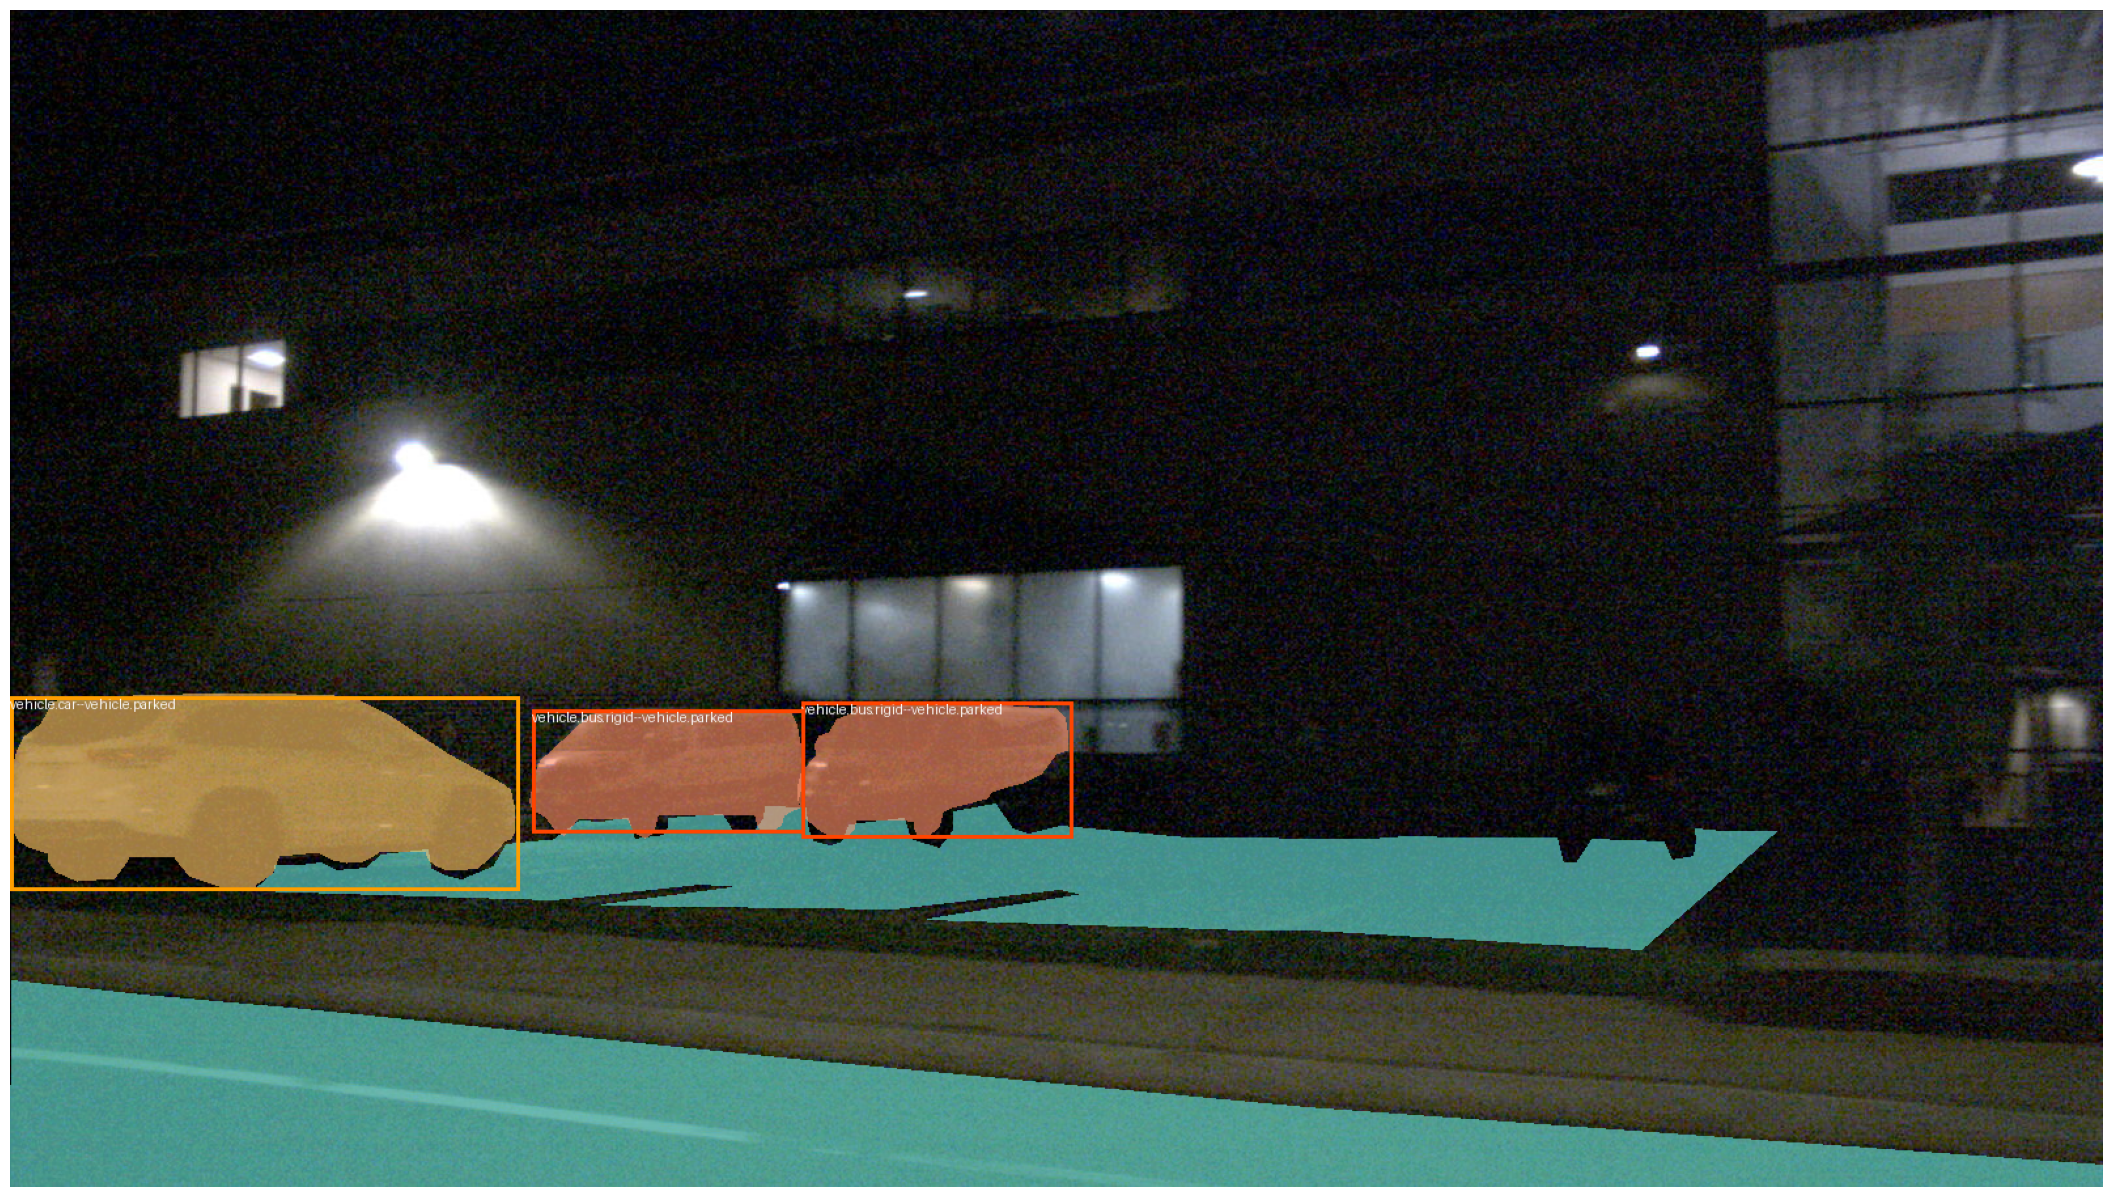

In [6]:
# Visualize the sample
nuim.render_image(detailed_sample['token'], annotation_type='all',
                  with_category=True, with_attributes=True, render_scale=3)

In [7]:
# List the annotations
object_tokens, surface_tokens = nuim.list_anns(sample['token'])

Printing object annotations:
06aece782e4d4cf192203f5c280f0c30 vehicle.car ['vehicle.parked']
2f8ff72849794e4eb426b1f07a0f8a33 vehicle.bus.rigid ['vehicle.parked']
ce19359b6d564a94bb045ddbefb336fe vehicle.bus.rigid ['vehicle.parked']

Printing surface annotations:
e2a57cbe30905861bb7a154c7702d1f0 flat.driveable_surface


In [8]:
# Access the annotation for the bicycle
ann_1 = nuim.get('object_ann', object_tokens[-1])
ann_1

{'token': 'ce19359b6d564a94bb045ddbefb336fe',
 'category_token': 'fedb11688db84088883945752e480c2c',
 'bbox': [399, 535, 607, 629],
 'mask': {'size': [900, 1600],
  'counts': 'X2BtOjRrazA4SDdJNUw1TDRNMk00TTJPMk4yTjFPMk8xTjNNMk4yTjNNMk4zTTJOMU8yTjFPMk8wTzJOMDAwMDAwMDAwME8xMDAwME8xMDAwMDEwME8xTzFPMU8xTzFPMU8xMDAwMDAwTzEwMDAwMDBPMTAwMDAwME8xMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMU8yTjJOMk4xTzJOMU8xTzAwMU8wMDFPMDAxT08xMDBPMU8xMDBOMk4yTjJMNEw0TzEwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAxTzRMM00yTjJOMDAxTzAwMU9PMTAwMDBPMTAwTzEwMDAwTzFPMTAwTzFOMkw1TTIwME8xTzEwMU4zTjJNM04yTjRLN0FpVU9lTlxqMFIxYDBZT1ZVT0hkbVlrMA=='},
 'attribute_tokens': ['9f65c1eaa74e4d5db46e87a34811e994'],
 'sample_data_token': 'feb7ac2facb04369bb28c4fa8d4aa831'}

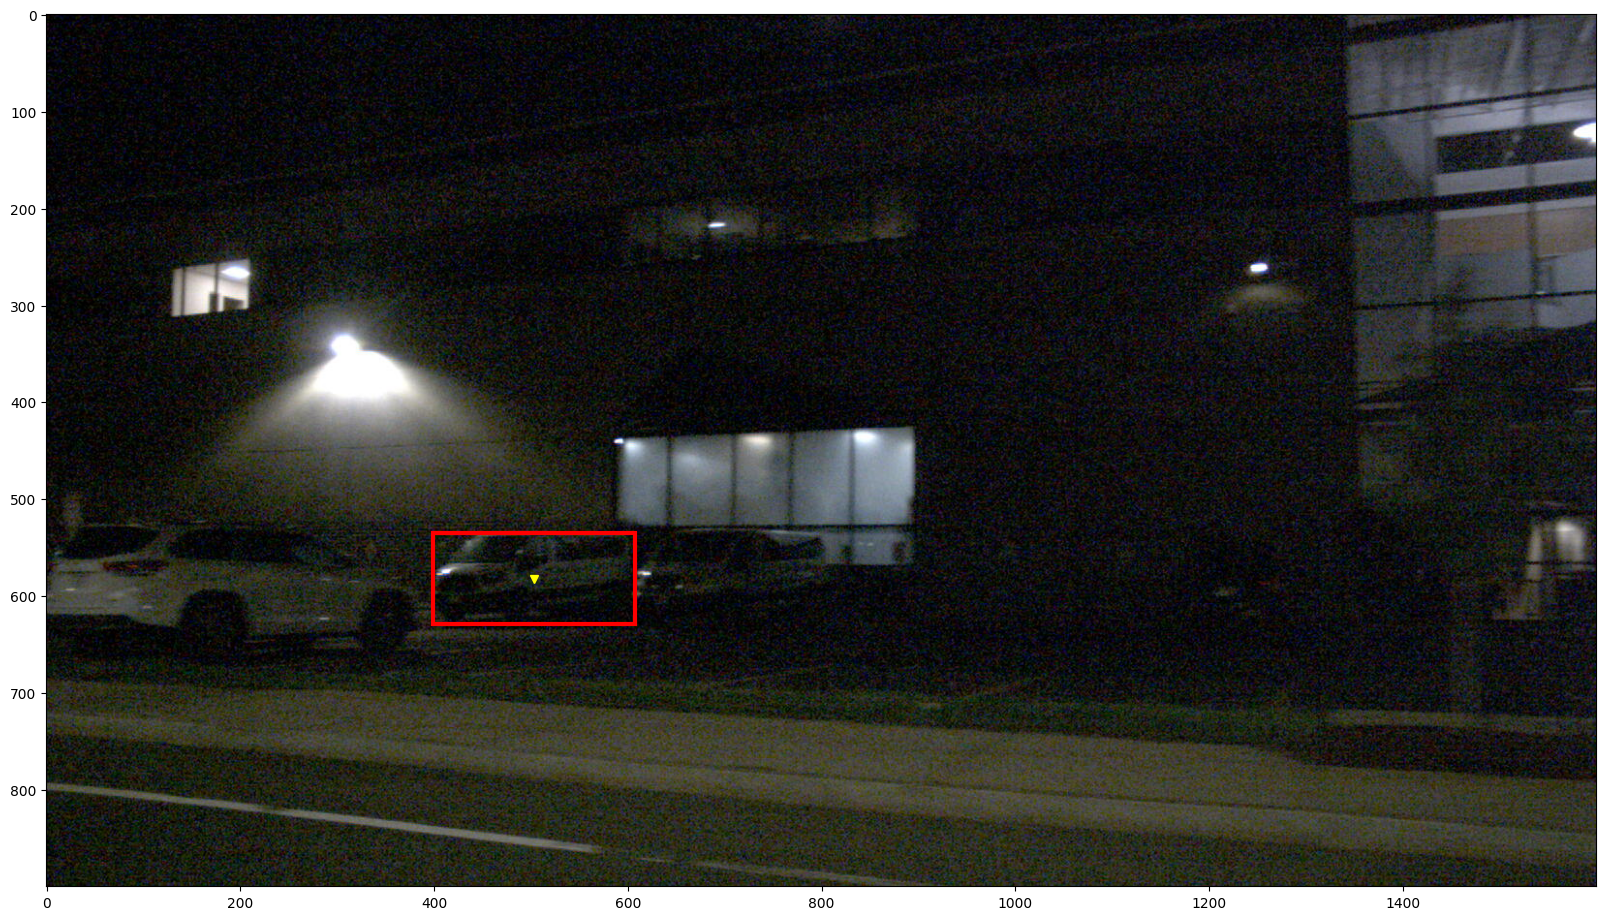

In [9]:
bbox = ann_1['bbox']
bbox_width = bbox[2] - bbox[0]
bbox_height = bbox[3] - bbox[1]
anchor = (bbox[0], bbox[1])
center = ( (bbox[0] + bbox[2]) / 2, (bbox[3] + bbox[1]) /2 )

plt.figure(figsize=(20,20))
img = plt.imread(f"//home/jv/Desktop/data/nuimages-v1.0-all-samples/{detailed_sample['filename']}")

fig = plt.imshow(img)
fig.axes.add_patch(plt.Rectangle(xy=anchor, width=bbox_width, height=bbox_height,
                                 fill=False, color='red', linewidth=3))
plt.plot(center[0], center[1], marker='v', color='yellow')

In [10]:
bbox_width, bbox_height, center

(208, 94, (503.0, 582.0))

In [12]:
# pixel_bounding_boxes = [x_center, y_center, width, height]
# normalized_bounding_boxes = pixel_bb scaled to between 0 and 1
pixel_bb = [center[0], center[1], bbox_width, bbox_height]
normalized_bb = normalize_bb(pixel_bb, IMG_WIDTH, IMG_HEIGHT)
pixel_bb, normalized_bb


([0.314375, 0.6466666666666666, 0.13, 0.10444444444444445],
 [0.314375, 0.6466666666666666, 0.13, 0.10444444444444445])

# Normalizing images and save into correct format

In [13]:
for sample in nuim.sample[:10]:
   annotate_img(sample)

In [14]:
print(class_mapper.keys())

dict_keys(['vehicle.bicycle', 'movable_object.barrier', 'static_object.bicycle_rack', 'movable_object.trafficcone', 'human.pedestrian.adult', 'vehicle.motorcycle', 'vehicle.car', 'vehicle.truck', 'vehicle.bus.rigid'])
